In [39]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # staviti -1 za CPU
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# import the needed libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# config
img_width, img_height = 28,28 #width & height of input image
input_depth = 1 #1: gray image
#train_data_dir = 'TrainingCro' #data training path
train_data_dir = 'Training/TrainingGer' #data training path

epochs = 20 #number of training epoch
batch_size = 10 #training batch size


list=[]
import os, shutil
for item in os.listdir(train_data_dir):
    s = os.path.join(train_data_dir, item)
    list.append(item)


# define image generator for Keras,
# here, we map pixel intensity to 0-1
train_datagen = ImageDataGenerator(rescale=1/255)


# read image batch by batch
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',#inpput iameg: gray
    target_size=(img_width,img_height),#input image size
    batch_size=batch_size,#batch size
    class_mode='categorical')#categorical: one-hot encoding format class label




Found 10921 images belonging to 8 classes.


In [119]:
#testing_data_dir = 'Test/TestGer' #data testing path
#testing_data_dir = 'Test/TestCro' #data testing path
#testing_data_dir = 'Test/TestFra' #data testing path
#testing_data_dir = 'Test/TestBel' #data testing path
testing_data_dir = 'Test/TestSwe' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 498 images belonging to 8 classes.


In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_102 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 activation_119 (Activation)  (None, 28, 28, 32)       0         
                                                                 
 conv2d_103 (Conv2D)         (None, 28, 28, 32)        9248      
                                                                 
 activation_120 (Activation)  (None, 28, 28, 32)       0         
                                                                 
 batch_normalization_51 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                

In [84]:
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator


testing_data_dir = 'Test/TestGer'




all_images = os.listdir(testing_data_dir)


num_validation_images = int(len(all_images) * 0.3)


validation_indices = random.sample(range(len(all_images)), num_validation_images)


test_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.3
)


test_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)


validation_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation' 
)


GerGer = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)


evaluacija_rezultati = model.evaluate(test_generator, steps=len(test_generator))
print("Rezultati evaluacije:", evaluacija_rezultati)


najbolji_test_rezultat = max(GerGer.history['val_accuracy'])

print("Najbolji val_točnost:", najbolji_test_rezultat)
evaluacija_rezultati = model.evaluate(test_generator, steps=len(test_generator))
print("Rezultati evaluacije:", evaluacija_rezultati)


najbolji_test_rezultat = evaluacija_rezultati[1]
print("Najbolji rezultat za testiranje:", najbolji_test_rezultat)


Epoch 1/10


/tmp/ipykernel_2759455/4141825987.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  GerGer = model.fit_generator(


1093/1093 [==============================] - 15s 13ms/step - loss: 0.1639 - accuracy: 0.9509 - val_loss: 0.1825 - val_accuracy: 0.9521
Epoch 2/10
1093/1093 [==============================] - 14s 13ms/step - loss: 0.0273 - accuracy: 0.9930 - val_loss: 0.0803 - val_accuracy: 0.9853
Epoch 3/10
1093/1093 [==============================] - 14s 13ms/step - loss: 0.0327 - accuracy: 0.9918 - val_loss: 0.1656 - val_accuracy: 0.9729
Epoch 4/10
1093/1093 [==============================] - 14s 13ms/step - loss: 0.0260 - accuracy: 0.9943 - val_loss: 1.0941 - val_accuracy: 0.8630
Epoch 5/10
1093/1093 [==============================] - 14s 13ms/step - loss: 0.0240 - accuracy: 0.9955 - val_loss: 0.0536 - val_accuracy: 0.9897
Epoch 6/10
1093/1093 [==============================] - 14s 13ms/step - loss: 0.0079 - accuracy: 0.9980 - val_loss: 0.0186 - val_accuracy: 0.9969
Epoch 7/10
1093/1093 [==============================] - 14s 13ms/step - loss: 1.2394e-04 - accuracy: 1.0000 - val_loss: 0.0204 - val_ac

In [85]:
best_val_accuracy_Ger = max(GerGer.history['val_accuracy'])
print('val: ', best_val_accuracy_Ger)


test_loss_ger, test_accuracy_ger = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_ger)
print("Test Accuracy:", test_accuracy_ger)

val:  0.9969177842140198
293/293 [==============================] - 1s 3ms/step - loss: 0.0522 - accuracy: 0.9911
Test Loss: 0.05222297087311745
Test Accuracy: 0.9911202192306519


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


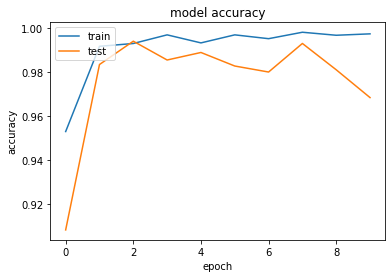

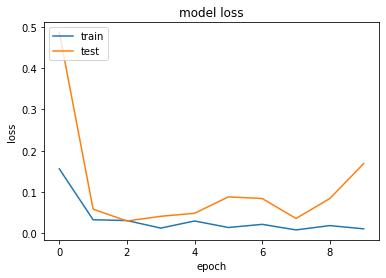

In [66]:
#Novo
# list all data in history
print(GerGer.history.keys())
# summarize history for accuracy
plt.plot(GerGer.history['accuracy'])
plt.plot(GerGer.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(GerGer.history['loss'])
plt.plot(GerGer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [88]:
#Ger + Cro
import matplotlib.pyplot as plt
GerCro = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
    )

Epoch 1/10


/tmp/ipykernel_2759455/2621192652.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  GerCro = model.fit_generator(


1093/1093 [==============================] - 13s 12ms/step - loss: 0.1944 - accuracy: 0.9414 - val_loss: 0.2747 - val_accuracy: 0.9270
Epoch 2/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0181 - accuracy: 0.9947 - val_loss: 0.2455 - val_accuracy: 0.9460
Epoch 3/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0362 - accuracy: 0.9898 - val_loss: 0.1838 - val_accuracy: 0.9556
Epoch 4/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0091 - accuracy: 0.9979 - val_loss: 0.2648 - val_accuracy: 0.9540
Epoch 5/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0325 - accuracy: 0.9924 - val_loss: 0.6079 - val_accuracy: 0.9222
Epoch 6/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0106 - accuracy: 0.9979 - val_loss: 0.1956 - val_accuracy: 0.9587
Epoch 7/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0144 - accuracy: 0.9967 - val_loss: 0.1774 - val_accura

In [89]:
best_val_accuracy_Cro = max(GerCro.history['val_accuracy'])
print('val: ', best_val_accuracy_Cro)


test_loss_cro, test_accuracy_cro = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_cro)
print("Test Accuracy:", test_accuracy_cro)

val:  0.9777777791023254
64/64 [==============================] - 0s 3ms/step - loss: 0.2817 - accuracy: 0.9748
Test Loss: 0.2816568613052368
Test Accuracy: 0.9747633934020996


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


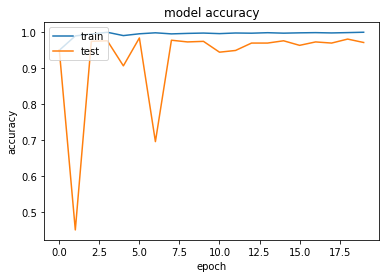

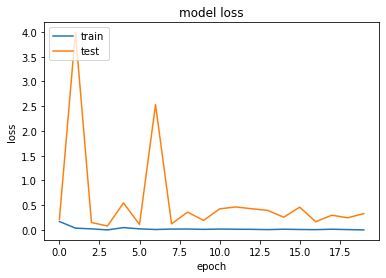

In [57]:
#Ger + Cro Nova mreža
# list all data in history
print(GerCro.history.keys())
# summarize history for accuracy
plt.plot(GerCro.history['accuracy'])
plt.plot(GerCro.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(GerCro.history['loss'])
plt.plot(GerCro.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [100]:
#Ger + Bel
import matplotlib.pyplot as plt
GerBel = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
    )

Epoch 1/10


/tmp/ipykernel_2759455/3527092543.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  GerBel = model.fit_generator(


1093/1093 [==============================] - 14s 12ms/step - loss: 0.1522 - accuracy: 0.9576 - val_loss: 0.8549 - val_accuracy: 0.8957
Epoch 2/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0282 - accuracy: 0.9919 - val_loss: 0.1693 - val_accuracy: 0.9723
Epoch 3/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0490 - accuracy: 0.9899 - val_loss: 0.1591 - val_accuracy: 0.9681
Epoch 4/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0077 - accuracy: 0.9982 - val_loss: 0.0918 - val_accuracy: 0.9851
Epoch 5/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0236 - accuracy: 0.9951 - val_loss: 0.0845 - val_accuracy: 0.9787
Epoch 6/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0249 - accuracy: 0.9945 - val_loss: 0.1758 - val_accuracy: 0.9851
Epoch 7/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0130 - accuracy: 0.9973 - val_loss: 0.7730 - val_accura

In [101]:
best_val_accuracy_Bel = max(GerBel.history['val_accuracy'])
print('val: ', best_val_accuracy_Bel)


test_loss_bel, test_accuracy_bel = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_bel)
print("Test Accuracy:", test_accuracy_bel)

val:  0.9851064085960388
48/48 [==============================] - 0s 4ms/step - loss: 0.6428 - accuracy: 0.9557
Test Loss: 0.6428070664405823
Test Accuracy: 0.9556962251663208


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


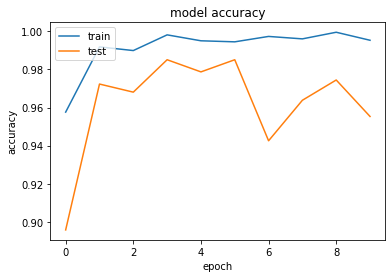

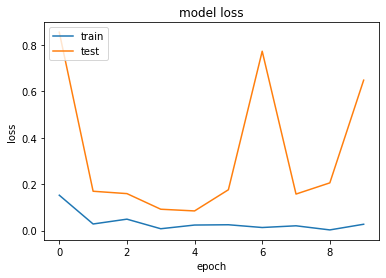

In [102]:
#ger +bel NOVA Mreža
# list all data in history
print(GerBel.history.keys())
# summarize history for accuracy
plt.plot(GerBel.history['accuracy'])
plt.plot(GerBel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(GerBel.history['loss'])
plt.plot(GerBel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [126]:
#Ger + Swe
import matplotlib.pyplot as plt
GerSwe = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
    )

Epoch 1/10
  10/1093 [..............................] - ETA: 13s - loss: 0.0000e+00 - accuracy: 1.0000

/tmp/ipykernel_2759455/2806444093.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  GerSwe = model.fit_generator(


1093/1093 [==============================] - 13s 12ms/step - loss: 5.1194e-09 - accuracy: 1.0000 - val_loss: 1.4338 - val_accuracy: 0.8633
Epoch 2/10
1093/1093 [==============================] - 13s 12ms/step - loss: 2.3796e-09 - accuracy: 1.0000 - val_loss: 1.4962 - val_accuracy: 0.8592
Epoch 3/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0324 - accuracy: 0.9953 - val_loss: 2.2349 - val_accuracy: 0.7837
Epoch 4/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 1.8268 - val_accuracy: 0.8469
Epoch 5/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0156 - accuracy: 0.9983 - val_loss: 2.2156 - val_accuracy: 0.8735
Epoch 6/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0130 - accuracy: 0.9973 - val_loss: 1.6478 - val_accuracy: 0.8510
Epoch 7/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 1.7108 - va

In [127]:
best_val_accuracy_Swe = max(GerSwe.history['val_accuracy'])
print('val: ', best_val_accuracy_Swe)


test_loss_swe, test_accuracy_swe = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_swe)
print("Test Accuracy:", test_accuracy_swe)

val:  0.8734694123268127
50/50 [==============================] - 0s 3ms/step - loss: 1.6621 - accuracy: 0.8534
Test Loss: 1.6620628833770752
Test Accuracy: 0.8534136414527893


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


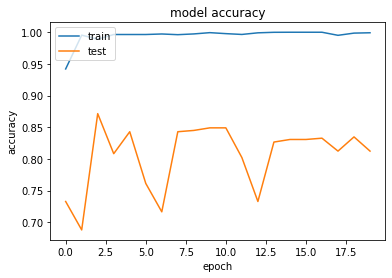

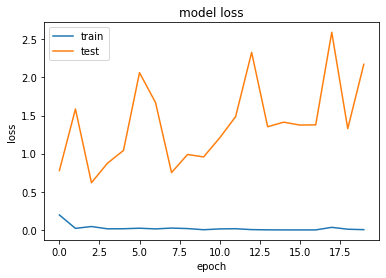

In [57]:
#Ger + Swe Nova Mreža
# list all data in history
print(GerSwe.history.keys())
# summarize history for accuracy
plt.plot(GerSwe.history['accuracy'])
plt.plot(GerSwe.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(GerSwe.history['loss'])
plt.plot(GerSwe.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [116]:
#Ger + Fra
import matplotlib.pyplot as plt
GerFra = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
    )

Epoch 1/10
  11/1093 [..............................] - ETA: 13s - loss: 0.0261 - accuracy: 0.9909   

/tmp/ipykernel_2759455/3471705546.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  GerFra = model.fit_generator(


1093/1093 [==============================] - 13s 12ms/step - loss: 0.0113 - accuracy: 0.9988 - val_loss: 1.4311 - val_accuracy: 0.8583
Epoch 2/10
1093/1093 [==============================] - 13s 12ms/step - loss: 9.4818e-04 - accuracy: 0.9998 - val_loss: 2.0787 - val_accuracy: 0.8333
Epoch 3/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0074 - accuracy: 0.9991 - val_loss: 1.3120 - val_accuracy: 0.8750
Epoch 4/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0037 - accuracy: 0.9995 - val_loss: 1.9124 - val_accuracy: 0.8583
Epoch 5/10
1093/1093 [==============================] - 13s 12ms/step - loss: 1.4308e-07 - accuracy: 1.0000 - val_loss: 1.9424 - val_accuracy: 0.8583
Epoch 6/10
1093/1093 [==============================] - 13s 12ms/step - loss: 4.1779e-07 - accuracy: 1.0000 - val_loss: 1.9571 - val_accuracy: 0.8500
Epoch 7/10
1093/1093 [==============================] - 13s 12ms/step - loss: 0.0091 - accuracy: 0.9989 - val_loss: 1.3884 

In [117]:
best_val_accuracy_Fra = max(GerFra.history['val_accuracy'])
print('val: ', best_val_accuracy_Fra)


test_loss_fra, test_accuracy_fra = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_fra)
print("Test Accuracy:", test_accuracy_fra)

val:  0.9083333611488342
13/13 [==============================] - 0s 4ms/step - loss: 2.0462 - accuracy: 0.8934
Test Loss: 2.0462350845336914
Test Accuracy: 0.8934426307678223


In [128]:

import pandas as pd

best_results = []


best_results.append({'Model': 'GerGer', 'Best Val_Accuracy': best_val_accuracy_Ger, 'Best Test Accuracy':test_accuracy_ger})
best_results.append({'Model': 'GerCro', 'Best Val_Accuracy': best_val_accuracy_Cro, 'Best Test Accuracy':test_accuracy_cro})
best_results.append({'Model': 'GerBel', 'Best Val_Accuracy': best_val_accuracy_Bel, 'Best Test Accuracy':test_accuracy_bel})
best_results.append({'Model': 'GerSwe', 'Best Val_Accuracy': best_val_accuracy_Swe, 'Best Test Accuracy':test_accuracy_swe})
best_results.append({'Model': 'GerFra', 'Best Val_Accuracy': best_val_accuracy_Fra, 'Best Test Accuracy':test_accuracy_fra})
df = pd.DataFrame(best_results)
print(df)    

    Model  Best Val_Accuracy  Best Test Accuracy
0  GerGer           0.996918            0.991120
1  GerCro           0.977778            0.974763
2  GerBel           0.985106            0.955696
3  GerSwe           0.873469            0.853414
4  GerFra           0.908333            0.893443


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


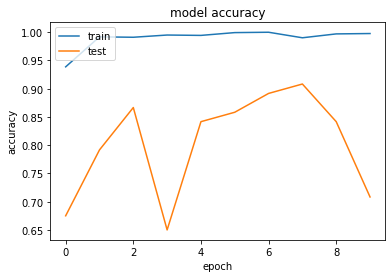

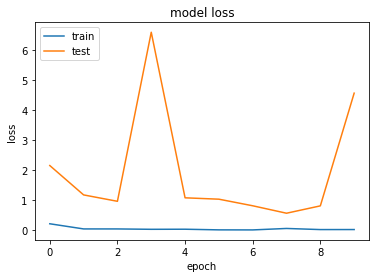

In [110]:
#ger + fra Nova Mreža
# list all data in history
print(GerFra.history.keys())
# summarize history for accuracy
plt.plot(GerFra.history['accuracy'])
plt.plot(GerFra.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(GerFra.history['loss'])
plt.plot(GerFra.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()